# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596
Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + 'q=' + city.replace(' ','+') + '&units=imperial' + '&APPID=' + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | lompoc
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | lompoc
Processing Record 3 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | kuytun
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | kuytun
Processing Record 6 of Set 1 | potsdam
Processing Record 6 of Set 1 | potsdam
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | dikson
Processing Record 9 of Set 1 | chuy
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | dikson
Processing Record 9 of Set 1 | chuy
Processing Record 10 of Set 1 | thanh hoa
Processing Record 10 of Set 1 | thanh hoa
Processing Record 11 of Se

Processing Record 43 of Set 2 | adrar
Processing Record 43 of Set 2 | adrar
Processing Record 44 of Set 2 | yellowknife
Processing Record 45 of Set 2 | barentsburg
City not found. Skipping...
Processing Record 46 of Set 2 | east london
Processing Record 44 of Set 2 | yellowknife
Processing Record 45 of Set 2 | barentsburg
City not found. Skipping...
Processing Record 46 of Set 2 | east london
Processing Record 47 of Set 2 | tautira
Processing Record 48 of Set 2 | kirakira
Processing Record 49 of Set 2 | bonavista
Processing Record 47 of Set 2 | tautira
Processing Record 48 of Set 2 | kirakira
Processing Record 49 of Set 2 | bonavista
Processing Record 0 of Set 3 | barrow
Processing Record 1 of Set 3 | kilindoni
Processing Record 0 of Set 3 | barrow
Processing Record 1 of Set 3 | kilindoni
Processing Record 2 of Set 3 | tuatapere
Processing Record 3 of Set 3 | inuvik
Processing Record 4 of Set 3 | castro
Processing Record 2 of Set 3 | tuatapere
Processing Record 3 of Set 3 | inuvik
Proc

City not found. Skipping...
Processing Record 39 of Set 4 | zaraza
Processing Record 40 of Set 4 | odweyne
Processing Record 41 of Set 4 | aljezur
Processing Record 40 of Set 4 | odweyne
Processing Record 41 of Set 4 | aljezur
Processing Record 42 of Set 4 | dingle
Processing Record 43 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 44 of Set 4 | kloulklubed
Processing Record 42 of Set 4 | dingle
Processing Record 43 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 44 of Set 4 | kloulklubed
Processing Record 45 of Set 4 | chapais
Processing Record 46 of Set 4 | haines city
Processing Record 45 of Set 4 | chapais
Processing Record 46 of Set 4 | haines city
Processing Record 47 of Set 4 | fairbanks
Processing Record 48 of Set 4 | miles city
Processing Record 47 of Set 4 | fairbanks
Processing Record 48 of Set 4 | miles city
Processing Record 49 of Set 4 | banda aceh
Processing Record 0 of Set 5 | baruun-urt
Processing Record 49 of Set 4 | banda aceh
P

Processing Record 37 of Set 6 | kerman
Processing Record 38 of Set 6 | singkawang
Processing Record 39 of Set 6 | rawannawi
Processing Record 37 of Set 6 | kerman
Processing Record 38 of Set 6 | singkawang
Processing Record 39 of Set 6 | rawannawi
City not found. Skipping...
Processing Record 40 of Set 6 | hamilton
Processing Record 41 of Set 6 | mahadday weyne
City not found. Skipping...
Processing Record 42 of Set 6 | makubetsu
Processing Record 43 of Set 6 | saint-imier
City not found. Skipping...
Processing Record 40 of Set 6 | hamilton
Processing Record 41 of Set 6 | mahadday weyne
City not found. Skipping...
Processing Record 42 of Set 6 | makubetsu
Processing Record 43 of Set 6 | saint-imier
Processing Record 44 of Set 6 | labutta
City not found. Skipping...
Processing Record 45 of Set 6 | marystown
Processing Record 46 of Set 6 | lolua
City not found. Skipping...
Processing Record 47 of Set 6 | santa fe
Processing Record 44 of Set 6 | labutta
City not found. Skipping...
Process

Processing Record 27 of Set 8 | jalu
Processing Record 28 of Set 8 | cafarnaum
Processing Record 29 of Set 8 | santiago del estero
Processing Record 30 of Set 8 | luau
Processing Record 31 of Set 8 | huazolotitlan
City not found. Skipping...
Processing Record 32 of Set 8 | ust-kuyga
Processing Record 33 of Set 8 | kongolo
Processing Record 31 of Set 8 | huazolotitlan
City not found. Skipping...
Processing Record 32 of Set 8 | ust-kuyga
Processing Record 33 of Set 8 | kongolo
Processing Record 34 of Set 8 | victoria
Processing Record 35 of Set 8 | kidal
Processing Record 36 of Set 8 | taga
Processing Record 37 of Set 8 | zachagansk
Processing Record 34 of Set 8 | victoria
Processing Record 35 of Set 8 | kidal
Processing Record 36 of Set 8 | taga
Processing Record 37 of Set 8 | zachagansk
City not found. Skipping...
Processing Record 38 of Set 8 | sringeri
Processing Record 39 of Set 8 | acarau
City not found. Skipping...
Processing Record 38 of Set 8 | sringeri
Processing Record 39 of S

Processing Record 24 of Set 10 | mugur-aksy
Processing Record 25 of Set 10 | lichinga
Processing Record 24 of Set 10 | mugur-aksy
Processing Record 25 of Set 10 | lichinga
Processing Record 26 of Set 10 | half moon bay
Processing Record 27 of Set 10 | mana
Processing Record 26 of Set 10 | half moon bay
Processing Record 27 of Set 10 | mana
Processing Record 28 of Set 10 | racine
Processing Record 28 of Set 10 | racine
Processing Record 29 of Set 10 | lebedinyy
Processing Record 30 of Set 10 | tucupita
Processing Record 29 of Set 10 | lebedinyy
Processing Record 30 of Set 10 | tucupita
Processing Record 31 of Set 10 | dubenskiy
City not found. Skipping...
Processing Record 32 of Set 10 | kyra
Processing Record 33 of Set 10 | nguiu
Processing Record 31 of Set 10 | dubenskiy
City not found. Skipping...
Processing Record 32 of Set 10 | kyra
Processing Record 33 of Set 10 | nguiu
City not found. Skipping...
Processing Record 34 of Set 10 | ukiah
Processing Record 35 of Set 10 | ranong
Proce

Processing Record 19 of Set 12 | belogorsk
Processing Record 20 of Set 12 | amboasary
Processing Record 19 of Set 12 | belogorsk
Processing Record 20 of Set 12 | amboasary
Processing Record 21 of Set 12 | los llanos de aridane
Processing Record 22 of Set 12 | plettenberg bay
Processing Record 23 of Set 12 | vanavara
Processing Record 24 of Set 12 | coevorden
Processing Record 21 of Set 12 | los llanos de aridane
Processing Record 22 of Set 12 | plettenberg bay
Processing Record 23 of Set 12 | vanavara
Processing Record 24 of Set 12 | coevorden
Processing Record 25 of Set 12 | hvide sande
Processing Record 26 of Set 12 | polyarnyy
Processing Record 27 of Set 12 | sala consilina
Processing Record 25 of Set 12 | hvide sande
Processing Record 26 of Set 12 | polyarnyy
Processing Record 27 of Set 12 | sala consilina
Processing Record 28 of Set 12 | colquiri
Processing Record 29 of Set 12 | marbella
Processing Record 28 of Set 12 | colquiri
Processing Record 29 of Set 12 | marbella
Processing

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,40.66,65,100,17.27,AR,1681350841
1,lompoc,34.6391,-120.4579,56.79,78,20,21.85,US,1681351019
2,bredasdorp,-34.5322,20.0403,55.42,74,99,5.99,ZA,1681350960
3,rikitea,-23.1203,-134.9692,77.61,69,67,10.78,PF,1681350947
4,kuytun,54.3419,101.5036,27.45,49,77,7.78,RU,1681351149


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,40.66,65,100,17.27,AR,1681350841
1,lompoc,34.6391,-120.4579,56.79,78,20,21.85,US,1681351019
2,bredasdorp,-34.5322,20.0403,55.42,74,99,5.99,ZA,1681350960
3,rikitea,-23.1203,-134.9692,77.61,69,67,10.78,PF,1681350947
4,kuytun,54.3419,101.5036,27.45,49,77,7.78,RU,1681351149


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,40.66,65,100,17.27,AR,1681350841
1,lompoc,34.6391,-120.4579,56.79,78,20,21.85,US,1681351019
2,bredasdorp,-34.5322,20.0403,55.42,74,99,5.99,ZA,1681350960
3,rikitea,-23.1203,-134.9692,77.61,69,67,10.78,PF,1681350947
4,kuytun,54.3419,101.5036,27.45,49,77,7.78,RU,1681351149


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,40.66,65,100,17.27,AR,1681350841
1,lompoc,34.6391,-120.4579,56.79,78,20,21.85,US,1681351019
2,bredasdorp,-34.5322,20.0403,55.42,74,99,5.99,ZA,1681350960
3,rikitea,-23.1203,-134.9692,77.61,69,67,10.78,PF,1681350947
4,kuytun,54.3419,101.5036,27.45,49,77,7.78,RU,1681351149


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

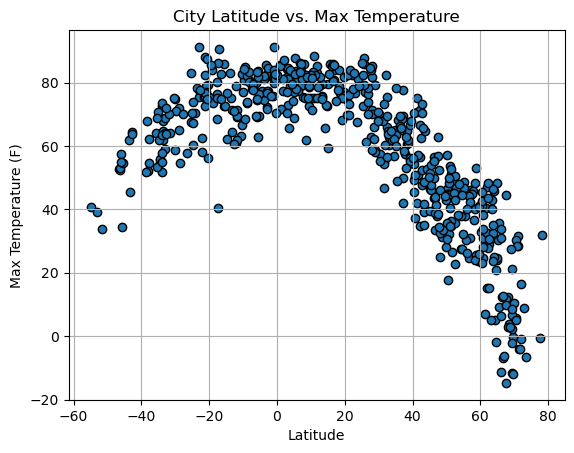

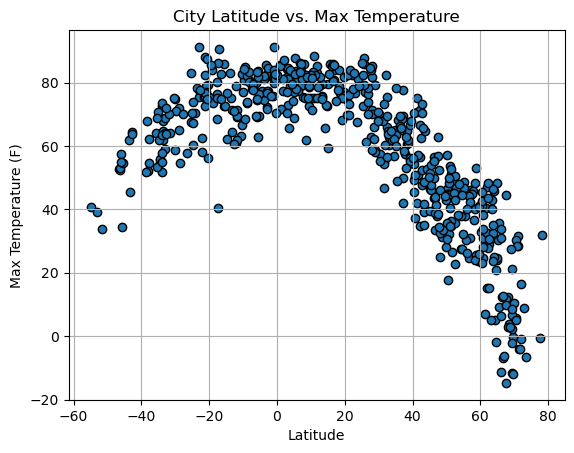

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

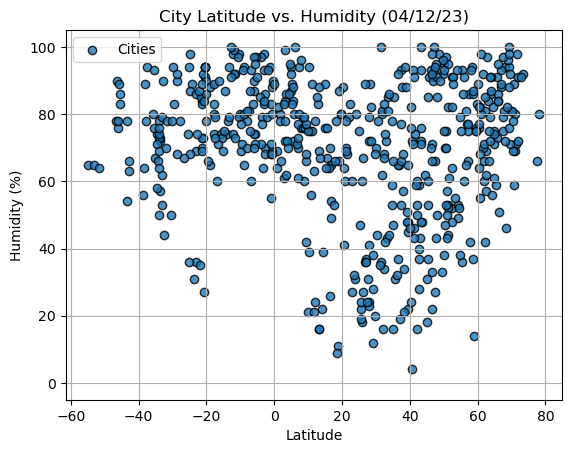

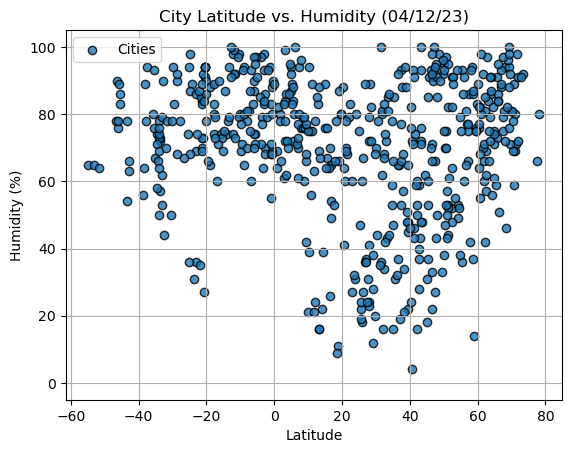

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(-5, 105)
plt.grid(True)
plt.legend(loc="best")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

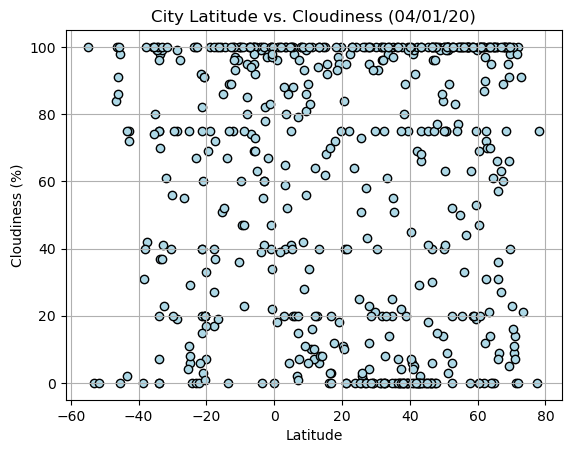

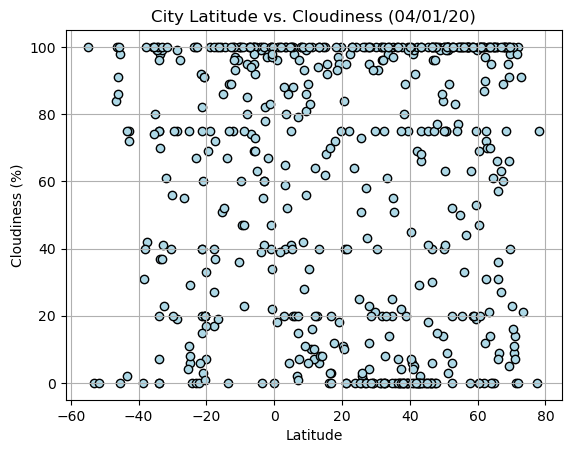

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", facecolors="lightblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

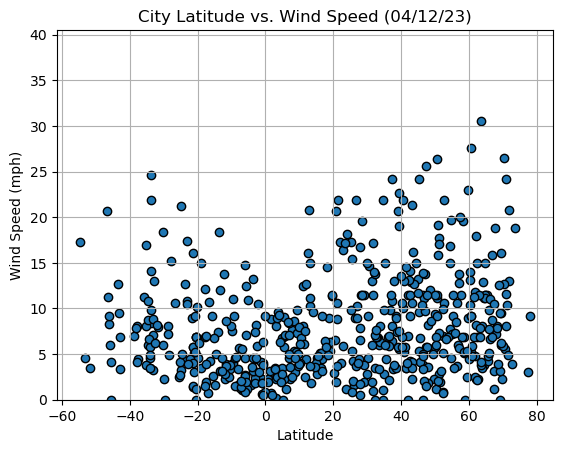

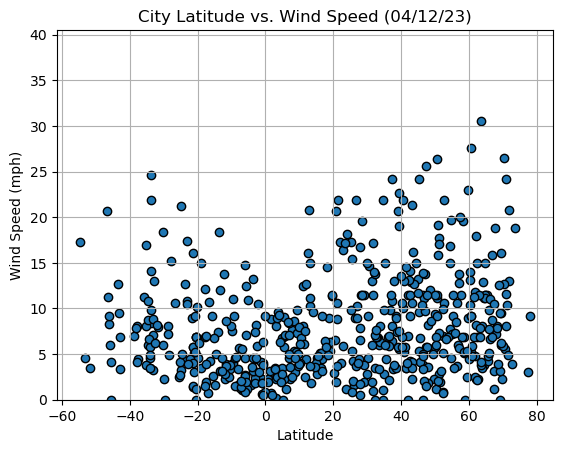

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (04/12/23)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(0, max(city_data_df["Wind Speed"])+10)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE